In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv('Syngas_Fermentation_Data_2.csv')
raw_data = raw_data.iloc[:,:8]
raw_data.columns = ['composition','trial','time','acetate','biomass', 'butanol','butyrate','ethanol']
raw_data.set_index(['composition','trial','time'],drop=True,inplace=True)
raw_data.to_csv('raw_data.csv')
raw_data.head()


acetate  biomass  butanol  butyrate  ethanol
composition trial time                                              
1           1     0.00     0.23     0.01     0.00      0.06     0.00
                  0.57    10.90     0.45     0.03      0.09    12.83
                  0.67    16.43     0.44     0.03      0.13    15.61
                  0.90    17.76     0.41     0.03      0.08    17.14
                  1.58    21.61     0.41     0.04      0.06    10.94

In [4]:
from plotting.plot_scatterplots import plot_scatterplots
plot_scatterplots(raw_data, "Raw Data")

In [5]:
from data_processing.smooth_interpolate_truncate import smooth_interpolate_truncate
smooth_data = smooth_interpolate_truncate(raw_data,0.1)
smooth_data.to_csv('smooth_data.csv')
smooth_data.head()



acetate   biomass   butanol  butyrate    ethanol
composition trial time                                                    
1           1     0.0   16.905029  0.429546  0.029818  0.075529  15.895240
                  0.1   18.001195  0.421076  0.028260  0.061033  15.607023
                  0.2   19.831073  0.410803  0.028316  0.051013  15.144135
                  0.3   22.196249  0.403602  0.031357  0.050367  14.522308
                  0.4   25.293925  0.403709  0.028700  0.035514  13.956015

In [6]:
from plotting.plot_smooth import plot_smooth
plot_smooth(smooth_data, raw_data)

ModuleNotFoundError: No module named 'get_time_values'

In [7]:
from get_kinetic_parameter_dictionary import get_kinetic_parameter_dictionary
kinetic_parameter_dict = get_kinetic_parameter_dictionary(smooth_data, 5)

composition: 1
False
Composition 1: Search 1 of 5, ssr: 14115.26695882714, valid: False
False
Composition 1: Search 2 of 5, ssr: 11488.042924703972, valid: False
False
Composition 1: Search 3 of 5, ssr: 10796.568502195554, valid: False
False
Composition 1: Search 4 of 5, ssr: 115212.8235568607, valid: False
True
Composition 1: Search 5 of 5, ssr: 74454.29081011377, valid: True


composition: 2
False
Composition 2: Search 1 of 5, ssr: 20227.211932013513, valid: False
False
Composition 2: Search 2 of 5, ssr: 7316.893123437168, valid: False
True
Composition 2: Search 3 of 5, ssr: 14879.412796267909, valid: True
True
Composition 2: Search 4 of 5, ssr: 171658.41881267785, valid: True
True
Composition 2: Search 5 of 5, ssr: 193418.84990343652, valid: True


composition: 3
True
Composition 3: Search 1 of 5, ssr: 498112.9974837903, valid: True
True
Composition 3: Search 2 of 5, ssr: 28829.285782879044, valid: True
False
Composition 3: Search 3 of 5, ssr: 295630.47328096366, valid: False
True
Composition 3: Search 4 of 5, ssr: 32704.228038008074, valid: True
True
Composition 3: Search 5 of 5, ssr: 33770.328600220935, valid: True


composition: 4
False
Composition 4: Search 1 of 5, ssr: 47342.398019035274, valid: False
True
Composition 4: Search 2 of 5, ssr: 8933.654866555851, valid: True
False
Composition 4: Search 3 of 5, ssr: 46607.95401619793, valid: False
True
Composition 4: Search 4 of 5, ssr: 51621.78126813271, valid: True
True
Composition 4: Search 5 of 5, ssr: 48861.764948756296, valid: True


composition: 5
True
Composition 5: Search 1 of 5, ssr: 1779.9251385341167, valid: True
False
Composition 5: Search 2 of 5, ssr: 53634.77316550608, valid: False
False
Composition 5: Search 3 of 5, ssr: 4700.915882305152, valid: False
False
Composition 5: Search 4 of 5, ssr: 3501.859536809333, valid: False
True
Composition 5: Search 5 of 5, ssr: 1702.1219463564162, valid: True


composition: 6
True
Composition 6: Search 1 of 5, ssr: 4588.2897897671855, valid: True
False
Composition 6: Search 2 of 5, ssr: 5559.603029709336, valid: False
False
Composition 6: Search 3 of 5, ssr: 2316.537766608744, valid: False
False
Composition 6: Search 4 of 5, ssr: 56547.64059933138, valid: False
False
Composition 6: Search 5 of 5, ssr: 15495.050657912789, valid: False


composition: 7
True
Composition 7: Search 1 of 5, ssr: 6204.627234578694, valid: True
False
Composition 7: Search 2 of 5, ssr: 152108.81486970524, valid: False
False
Composition 7: Search 3 of 5, ssr: 1818.4054615823948, valid: False
False
Composition 7: Search 4 of 5, ssr: 2198.0332617299705, valid: False
False
Composition 7: Search 5 of 5, ssr: 2391.254856494432, valid: False


In [21]:
# for comp in range(1,8):
#     print ('composition:', (comp))
#     print(result_dict[comp].params['a_ac_1'].value + result_dict[comp].params['a_bm_1'].value)
#     print(result_dict[comp].params['a_ac_2'].value + result_dict[comp].params['a_et_2'].value
#          +result_dict[comp].params['a_bt_2'].value + result_dict[comp].params['a_bl_2'].value)
#     display(result_dict[comp])

In [11]:
from get_kinetic_model_data import get_kinetic_model_data

kinetic_data = get_kinetic_model_data(smooth_data, kinetic_parameter_dict)
fitted_data.head()


acetate   biomass   butanol  butyrate    ethanol
composition time                                                    
1.0         0.0   15.992719  0.409529  0.105137  0.068777  16.239544
            0.1   15.999204  0.410600  0.105137  0.068777  16.239544
            0.2   16.005715  0.411676  0.105137  0.068777  16.239544
            0.3   16.012226  0.412752  0.105137  0.068777  16.239544
            0.4   16.018751  0.413831  0.105137  0.068777  16.239544

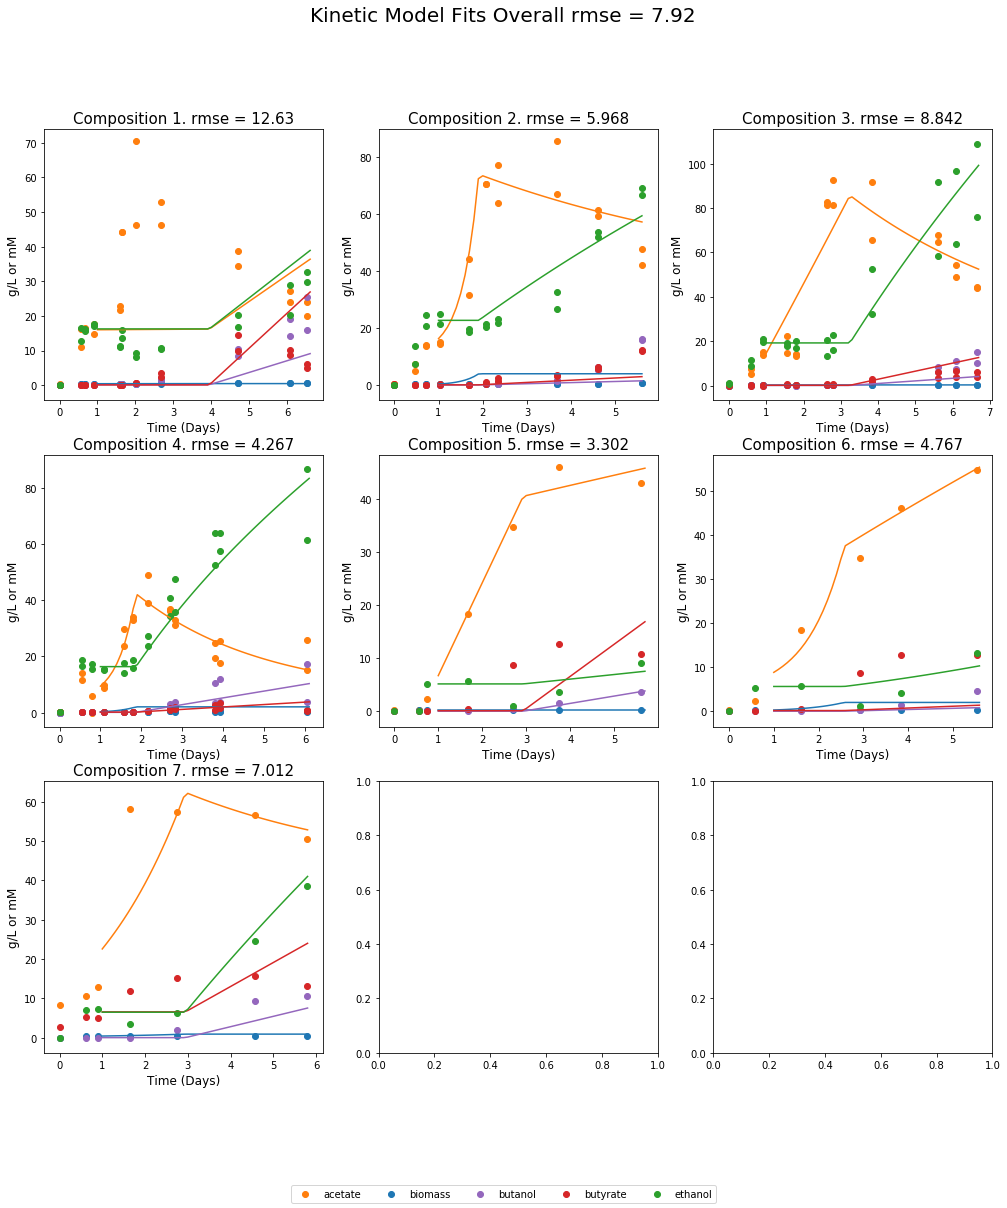

In [12]:
from plot_fit import plot_fit
plot_fit(fitted_data, raw_data, 'Kinetic Model Fits')

In [19]:
from calculate_slopes import calculate_slopes
raw_data_slopes = calculate_slopes(raw_data)
raw_data_slopes.to_csv('raw_data_slopes.csv')

smooth_data_slopes = calculate_slopes(smooth_data)
smooth_data_slopes.to_csv('smooth_data_slopes.csv')

kinetic_data_slopes = calculate_slopes(kinetic_data)
kinetic_data_slopes.to_csv('kinetic_data_slopes.csv')


In [19]:
raw_data_slopes

trial  time  acetate  biomass  butanol  butyrate  ethanol   Δ acetate  \
1       1  0.00     0.23     0.01     0.00      0.06     0.00   18.719298   
1       1  0.57    10.90     0.45     0.03      0.09    12.83   55.300000   
1       1  0.67    16.43     0.44     0.03      0.13    15.61    5.782609   
1       1  0.90    17.76     0.41     0.03      0.08    17.14    5.661765   
1       1  1.58    21.61     0.41     0.04      0.06    10.94  324.285714   
..    ...   ...      ...      ...      ...       ...      ...         ...   
7       1  0.63    10.68     0.48     0.00      5.14     6.96    8.461538   
7       1  0.89    12.88     0.38     0.00      5.02     7.17   59.552632   
7       1  1.65    58.14     0.39     0.00     11.75     3.48   -0.772727   
7       1  2.75    57.29     0.50     2.02     15.06     6.30   -0.371585   
7       1  4.58    56.61     0.45     9.31     15.67    24.63   -5.041322   

    Δ biomass  Δ butanol  Δ butyrate  Δ ethanol     CO    CO2     H2  \
1    0.771930   0.052632    0.052632  22.508772  0.500  0.375  0.125   
1   -0.100000   0.000000    0.400000  27.800000  0.500  0.375  0.125   
1   -0.130435   0.000000   -0.217391   6.652174  0.500  0.375  0.125   
1    0.000000   0.014706   -0.029412  -9.117647  0.500  0.375  0.125   
1   -0.285714   0.142857    0.285714  70.714286  0.500  0.375  0.125   
..        ...        ...         ...        ...    ...    ...    ...   
7   -0.384615   0.000000   -0.461538   0.807692  0.571  0.429  0.000   
7    0.013158   0.000000    8.855263  -4.855263  0.571  0.429  0.000   
7    0.100000   1.836364    3.009091   2.563636  0.571  0.429  0.000   
7   -0.027322   3.983607    0.333333  10.016393  0.571  0.429  0.000   
7    0.057851   1.165289   -2.123967  11.462810  0.571  0.429  0.000   

    Flow Rate  
1           1  
1           1  
1           1  
1           1  
1           1  
..        ...  
7           1  
7           1  
7           1  
7           1  
7           1  

[97 rows x 16 columns]

In [18]:
smooth_data_slopes

trial  time    acetate   biomass    butanol   butyrate    ethanol  \
1       1   0.0  16.905029  0.429546   0.029818   0.075529  15.895240   
1       1   0.1  18.001195  0.421076   0.028260   0.061033  15.607023   
1       1   0.2  19.831073  0.410803   0.028316   0.051013  15.144135   
1       1   0.3  22.196249  0.403602   0.031357   0.050367  14.522308   
1       1   0.4  25.293925  0.403709   0.028700   0.035514  13.956015   
..    ...   ...        ...       ...        ...        ...        ...   
7       1   4.3  52.890993  0.492020  10.252282  14.113528  33.280452   
7       1   4.4  52.417050  0.497531  10.353190  13.912766  34.337605   
7       1   4.5  51.937565  0.503219  10.441191  13.707886  35.373968   
7       1   4.6  51.452539  0.509086  10.516285  13.498888  36.389540   
7       1   4.7  50.961971  0.515132  10.578470  13.285772  37.384323   

    Δ acetate  Δ biomass  Δ butanol  Δ butyrate  Δ ethanol     CO    CO2  \
1   10.961665  -0.084697  -0.015584   -0.144950  -2.882172  0.500  0.375   
1   18.298778  -0.102733   0.000561   -0.100208  -4.628878  0.500  0.375   
1   23.651756  -0.072009   0.030416   -0.006462  -6.218271  0.500  0.375   
1   30.976760   0.001068  -0.026579   -0.148525  -5.662923  0.500  0.375   
1   37.112317   0.025050   0.023385    0.056090  -6.339674  0.500  0.375   
..        ...        ...        ...         ...        ...    ...    ...   
7   -4.739431   0.055103   1.009089   -2.007624  10.571530  0.571  0.429   
7   -4.794846   0.056887   0.880010   -2.048802  10.363627  0.571  0.429   
7   -4.850262   0.058671   0.750931   -2.089980  10.155725  0.571  0.429   
7   -4.905677   0.060455   0.621852   -2.131158   9.947823  0.571  0.429   
7   -4.961092   0.062239   0.492773   -2.172336   9.739920  0.571  0.429   

       H2  Flow Rate  
1   0.125          1  
1   0.125          1  
1   0.125          1  
1   0.125          1  
1   0.125          1  
..    ...        ...  
7   0.000          1  
7   0.000          1  
7   0.000          1  
7   0.000          1  
7   0.000          1  

[561 rows x 16 columns]

In [14]:
# can start here if reset
import pandas as pd
raw_data = pd.read_csv('raw_data.csv')
raw_data.set_index(['composition','trial','time'],drop=True,inplace=True)

smooth_data = pd.read_csv('smooth_data.csv')
smooth_data.set_index(['composition','trial','time'],drop=True,inplace=True)

raw_data_slopes = pd.read_csv('raw_data_slopes.csv', index_col=0)
smooth_data_slopes = pd.read_csv('smooth_data_slopes.csv', index_col=0)
# kinetic_data_slopes = pd.read_csv('kinetic_data_slopes.csv', index_col=0)

In [15]:
from get_ml_slope_prediction_dict import get_ml_slope_prediction_dict

# slope_ml_dict_from_raw_rf = get_ml_slope_prediction_dict(raw_data_slopes, smooth_data_slopes, 'random forest')
# slope_ml_dict_from_raw_gb = get_ml_slope_prediction_dict(raw_data_slopes, smooth_data_slopes, 'gradient boosting')

# slope_ml_dict_from_smooth_rf = get_ml_slope_prediction_dict(smooth_data_slopes, smooth_data_slopes, 'random forest')
slope_ml_dict_from_smooth_gb = get_ml_slope_prediction_dict(smooth_data_slopes, smooth_data_slopes, 'gradient boosting')

# ml_dict_from_kinetic_rf = get_ml_slope_prediction_dict(kinetic_data, smooth_data, 'random forest')
# ml_dict_from_kinetic_gb = get_ml_slope_prediction_dict(kinetic_data, smooth_data, 'gradient boosting')

In [16]:
from get_ml_slope_time_course_data import get_ml_slope_time_course_data

time_course_ml_data_from_smooth_gb = get_ml_slope_time_course_data(slope_ml_dict_from_smooth_gb, smooth_data_slopes)

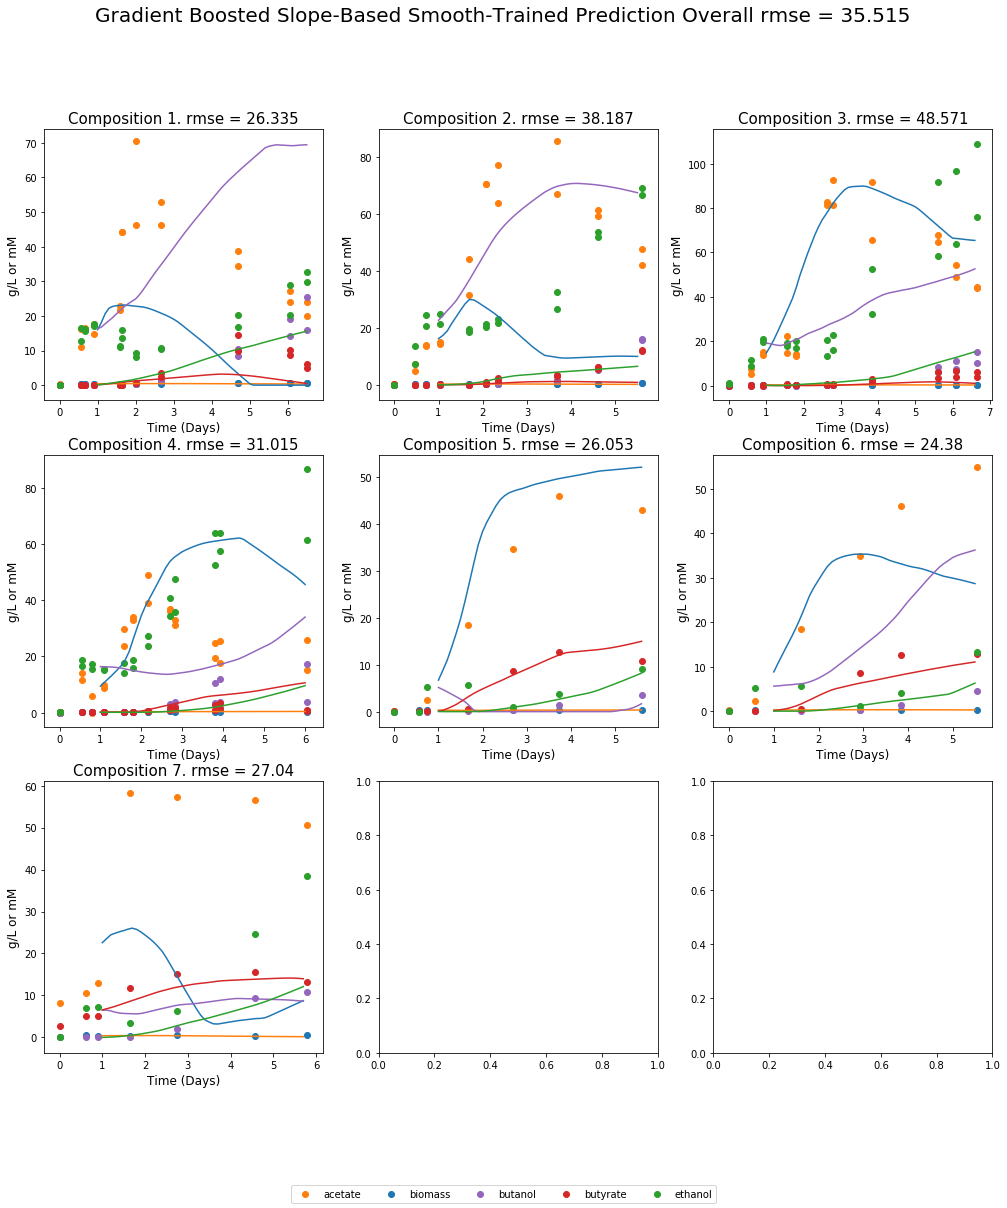

In [17]:
from plot_fit import plot_fit
plot_fit(time_course_ml_data_from_smooth_gb, raw_data, 'Gradient Boosted Slope-Based Smooth-Trained Prediction')

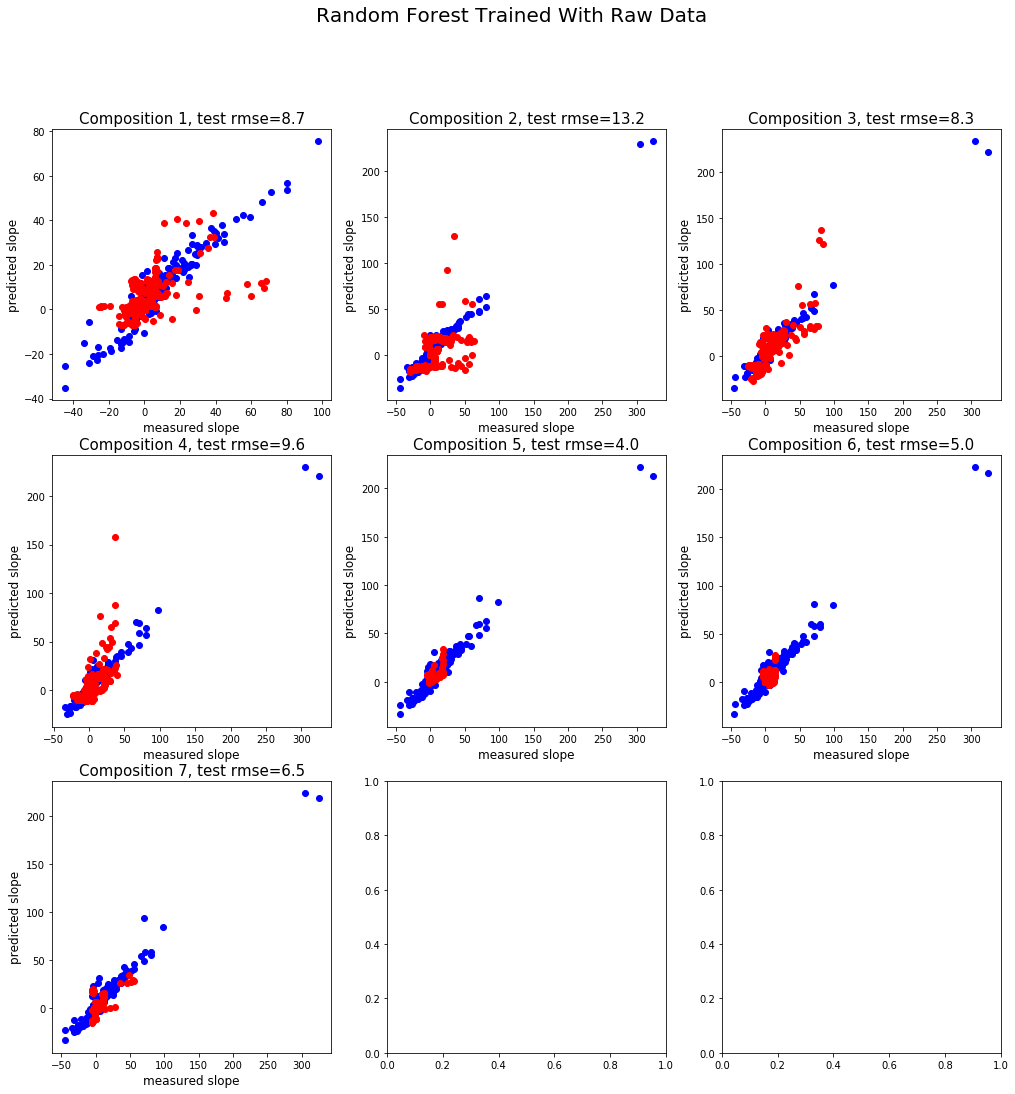

In [7]:
from plot_ml_slope_predictions import plot_ml_slope_predictions
plot_ml_slope_predictions(slope_ml_dict_from_raw_rf, 'Random Forest Trained With Raw Data')

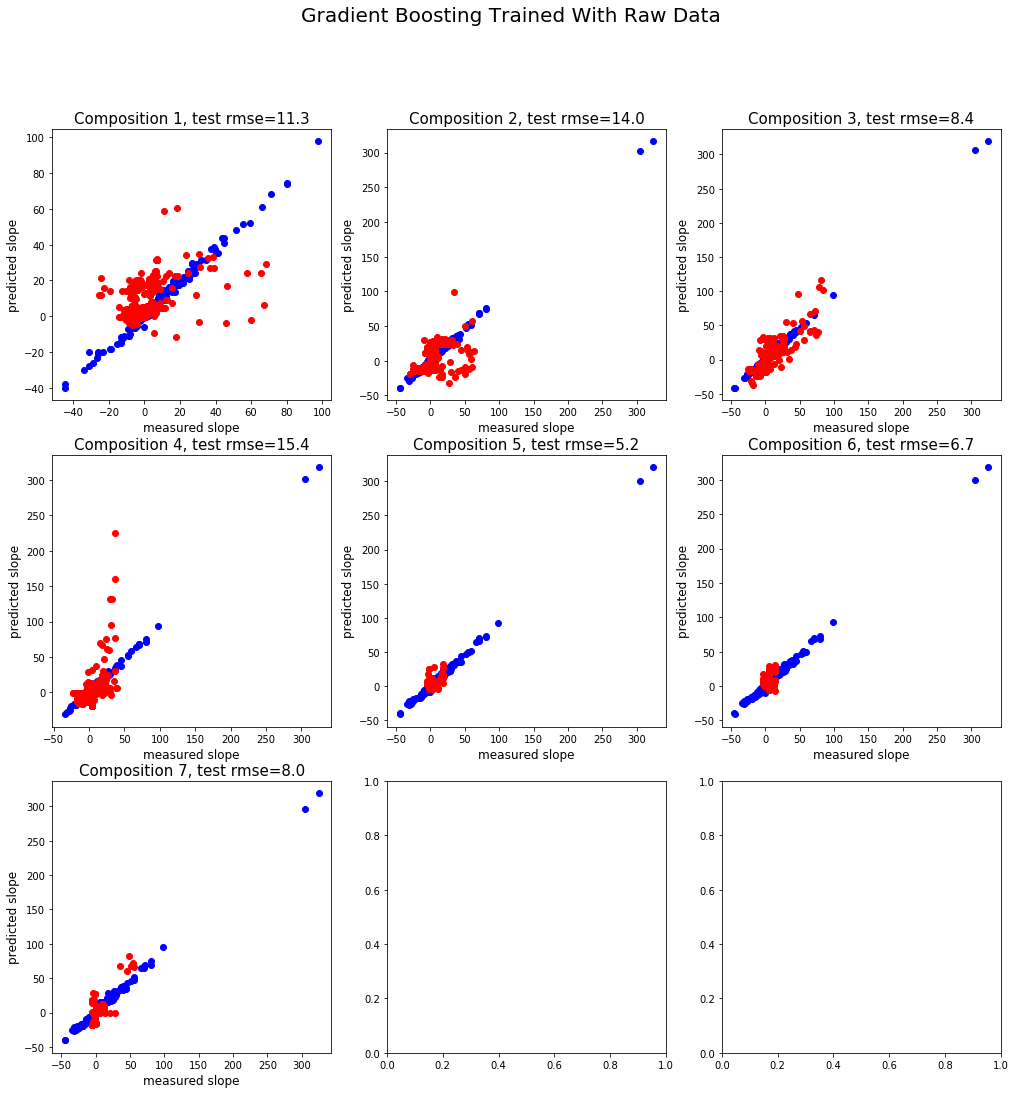

In [8]:
plot_ml_slope_predictions(slope_ml_dict_from_raw_gb, 'Gradient Boosting Trained With Raw Data')

In [20]:
plot_ml_slope_predictions(slope_ml_dict_from_smooth_rf, 'Random Forest Trained With Smooth Data')

NameError: name 'plot_ml_slope_predictions' is not defined

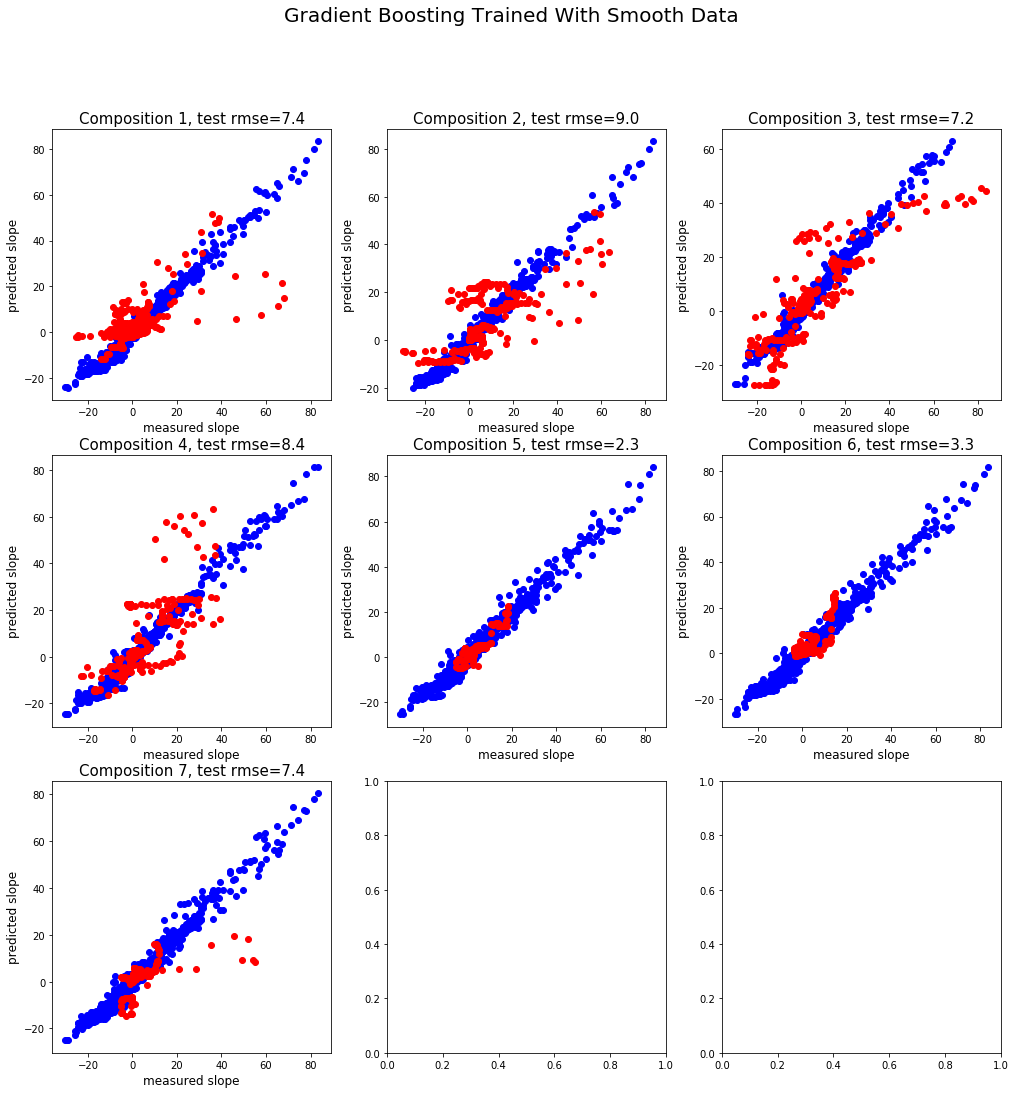

In [9]:
plot_ml_slope_predictions(slope_ml_dict_from_smooth_gb, 'Gradient Boosting Trained With Smooth Data')

In [16]:


from get_ml_slope_time_course_data import get_ml_slope_time_course_data

get_ml_slope_time_course_data(slope_ml_dict_from_smooth_gb, smooth_data_slopes)

16635994639093
0.9116635994639093
0.9116635994639093
0.9116635994639093
0.8732979179065645
0.8732979179065645
0.9116635994639092
0.9116635994639092
0.9030528273628305
0.9030528273628305
0.9328077368190966
0.9328077368190966
0.9328077368190966
0.9582110344584698
0.9582110344584698
0.983614332097843
0.983614332097843
1.0090176297372162
1.0090176297372162
1.0416903568155638
1.0416903568155638
1.0743630838939113
1.0743630838939113
1.107035810972259
1.107035810972259
1.1397085380506065
1.1397085380506065
1.2068599399065576
1.2068599399065576
1.2740113417625087
1.2740113417625087
1.3411627436184599
1.3411627436184599
1.4247154850726118
1.4247154850726118
1.5082682265267637
1.5082682265267637
1.610870093329372
1.610870093329372
1.7134719601319803
1.7134719601319803
1.8160738269345886
1.8160738269345886
1.9177069669772455
1.9177069669772455
1.9177069669772455
2.0193401070199024
2.0193401070199024
2.120973247062559
2.120973247062559
2.2226063871052157
2.2226063871052157
2.2226063871052157
2.373